In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/13587/Desktop/kaggle/churn-bigml-80.csv')

In [3]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
missing_values = df.isnull().sum()
missing_values
#df.dtypes
df.info()#outline of data
list(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [5]:
df.describe()#(continuous variables)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
column_names = df.columns
column_names

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

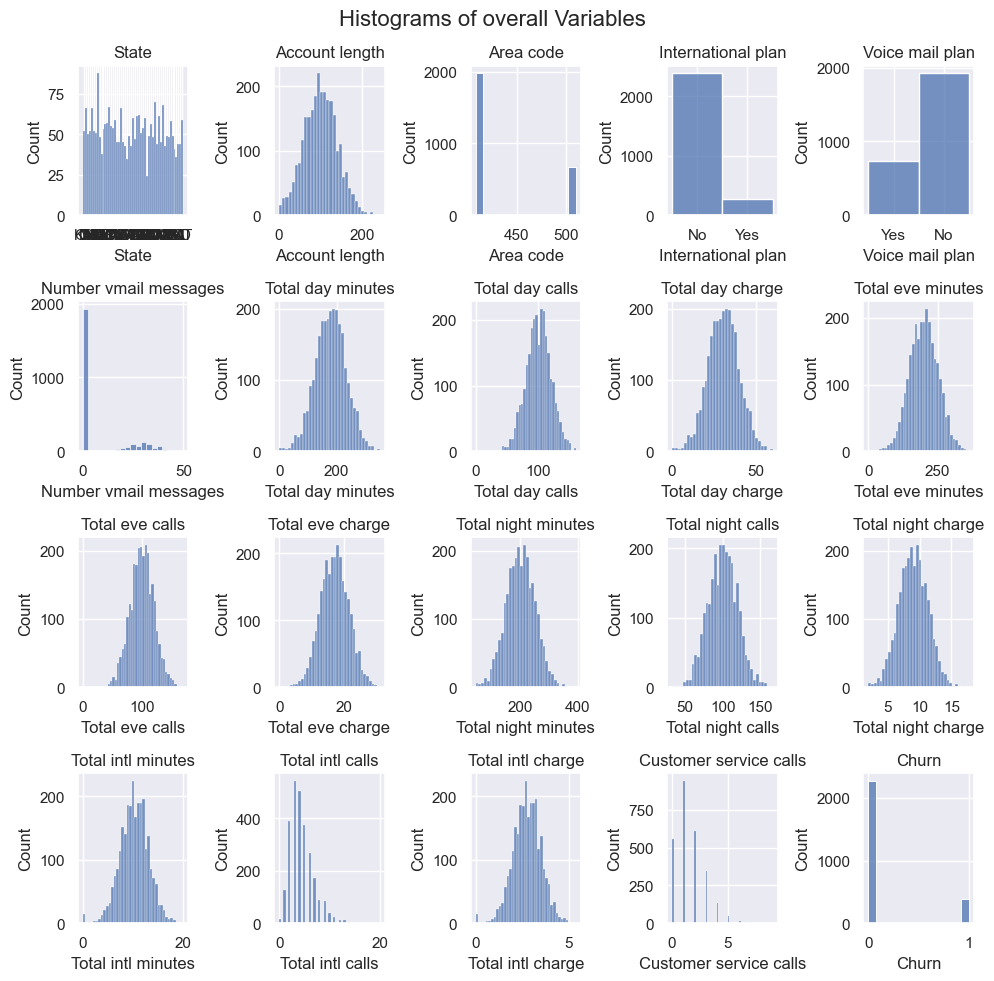

In [7]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))
axes = axes.ravel()
cols = df.columns  # List of dataframe columns to use

for col, ax in zip(cols, axes):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(col)

# Set the main title for all subplots
fig.suptitle('Histograms of overall Variables', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

# add density we can see another description of dataset
#for col, ax in zip(cols, axes):
#    sns.histplot(data=df, x=col,ax=ax,kde=True,
#    stat="density",kde_kws=dict(cut=3),
#    alpha=.4, edgecolor=(1, 1, 1, .4),)
#    ax.set_title(col)

Here we can easily get a description of the overall variables, including categorical variables and continuous variables. Most of the variables are approximately normally distributed, but some of them are skewed left or right.

There are 3 categorical variables, Let's check it again by pie chart

Index(['No', 'Yes'], dtype='object', name='International plan')
[2396  270]
Index(['No', 'Yes'], dtype='object', name='Voice mail plan')
[1933  733]
Index([False, True], dtype='bool', name='Churn')
[2278  388]


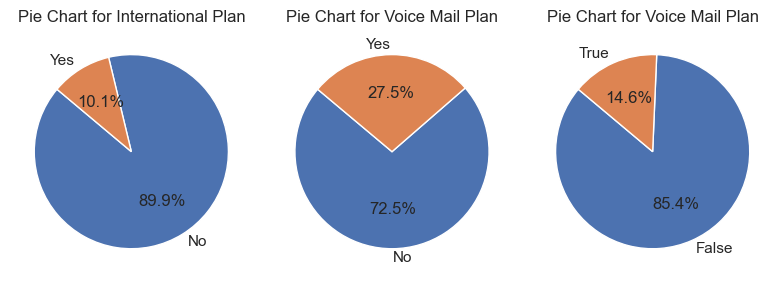

In [8]:
sns.set(style="darkgrid")
# Create a figure with two subplots (one for each pie chart)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

# First Pie Chart
category_counts0 = df['International plan'].value_counts()
labels0 = category_counts0.index;print(labels0)
sizes0 = category_counts0.values;print(sizes0)

axes[0].pie(sizes0, labels=labels0, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Pie Chart for International Plan')

# Second Pie Chart
category_counts1 = df['Voice mail plan'].value_counts()
labels1 = category_counts1.index;print(labels1)
sizes1 = category_counts1.values;print(sizes1)

axes[1].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Pie Chart for Voice Mail Plan')

# Churn True=
category_counts2 = df['Churn'].value_counts()
labels2 = category_counts2.index;print(labels2)
sizes2 = category_counts2.values;print(sizes2)

axes[2].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Pie Chart for Voice Mail Plan')

# Adjust the layout
plt.tight_layout()

# Display the subplots
plt.show()

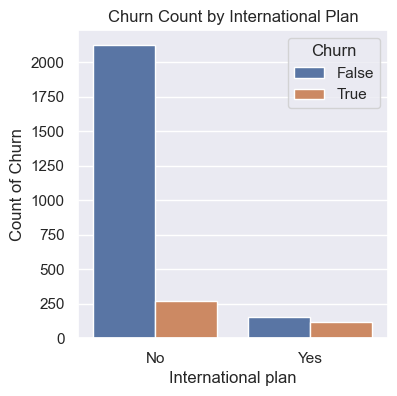

In [9]:
sns.set(style="darkgrid")
fig,ax=plt.subplots(1,1,figsize=(4,4))
sns.countplot(x='International plan',data=df,hue='Churn')
plt.xlabel('International plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by International Plan')
plt.show()

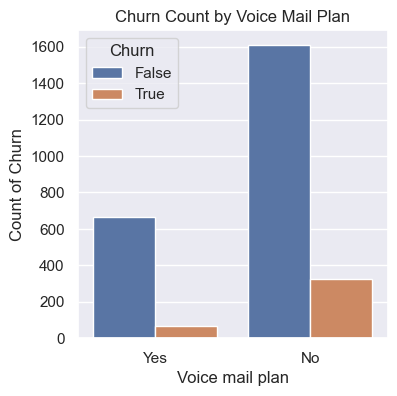

In [10]:
sns.set(style="darkgrid")
fig,ax=plt.subplots(1,1,figsize=(4,4))
sns.countplot(x='Voice mail plan',data=df,hue='Churn')
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by Voice Mail Plan')
plt.show()

2 categorical variables (choose yes/no) may have some relations with "Churn",need to consider it later.

In [11]:
# Another attempt to get a heatmap/avoid
# Select non-numerical columns
#non_numerical_cols = df.select_dtypes(exclude=['number'])
# Drop the non-numerical columns from the DataFrame
#df1 = df.drop(non_numerical_cols, axis=1)

Encode the categorical values into numerical values. \
Then create a correlation Heatmap to check the relationship with 19 varibales.\
positive relation: Total day charge/total day mins; Total eve charge/total eve mins; Total night charge/total night mins; Total intl charge/total intl mins. The reason is obvious, we get the hint that not all features will have an impact on the target "churn".\
Later we may select more important features to train the model.

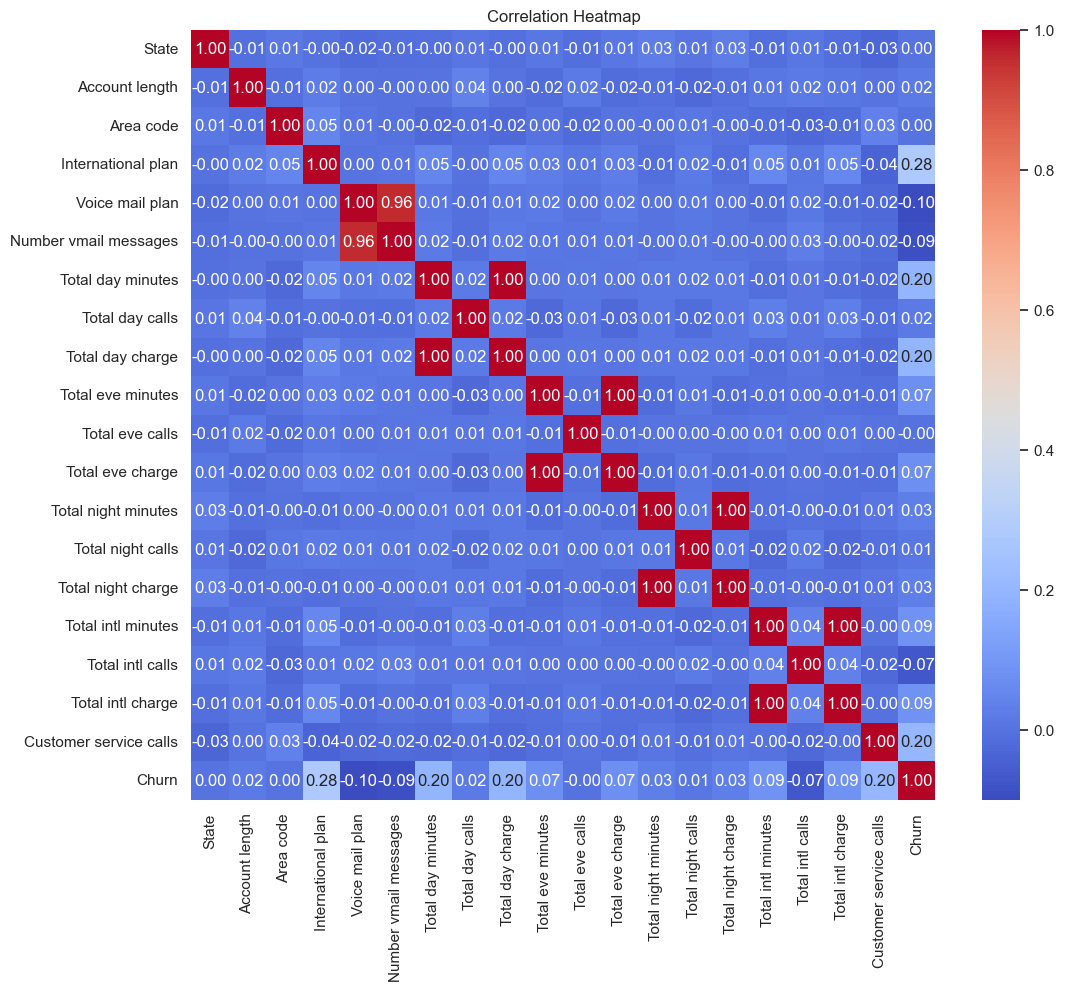

In [12]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le=LabelEncoder()
category=['State','International plan','Voice mail plan']

# Iterate through the columns and encode them
for i in category:
  df[i]=le.fit_transform(df[i])
#encode the categorical values in those columns into numerical values.
##
df['Churn'] = df['Churn'].astype(int)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X=df.iloc[:,:-1]
X.head()
#X = df.drop(columns=['Churn'])
# check dataset 0-no, 1-yes
y=df.iloc[:,-1]
y.head()
#y = df['Churn']

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

In [14]:
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

Prepare test dataset

In [15]:
# Read the CSV file into a DataFrame
test = pd.read_csv('C:/Users/13587/Desktop/kaggle/churn-bigml-20.csv')
test['Churn']=test['Churn'].astype(int)

# Iterate through the columns and encode them
for i in category:
  test[i]=le.fit_transform(test[i])
#test.head(5)

In [16]:
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]
X_test.head(5)
#y_test.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


Here I tried several 10-fold cross-mutation machine learning models, and the training results are shown in the box plot.
Ignores the effects of hyperparameters, thresholds, etc.\
NOTE with KNN model:\
KNN is sensitive to missing data\
KNN is a distance-based algorithm, and the scale of your features can have a significant impact on its performance. Ensure that features are appropriately scaled or normalized to have similar ranges. Using tools like StandardScaler or MinMaxScaler from scikit-learn can help in this regard.
Class Imbalance\
Hyperparas tuning The choice of 'k' (the number of nearest neighbours) \
May affected by high-dimensional dataset

LR: 0.863092 (0.008236)
LDA: 0.854845 (0.013357)
CART: 0.909610 (0.016248)
NB: 0.861594 (0.014830)
SVM: 0.854465 (0.001356)
RF: 0.950870 (0.008080)
ADA: 0.877355 (0.013840)
GBM: 0.952375 (0.012289)
XGB: 0.953498 (0.010598)


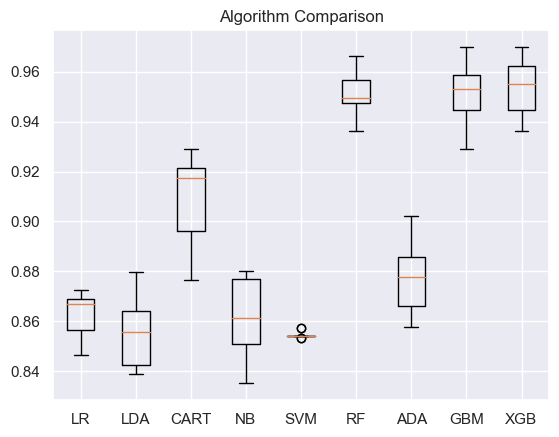

In [17]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) #LR threshold tune
models.append(('LDA', LinearDiscriminantAnalysis()))#LDA
#models.append(('KNN', KNeighborsClassifier()))#KNN (distance)
models.append(('CART', DecisionTreeClassifier()))#decision tree (normally worse than random forest)
models.append(('NB', GaussianNB()))#Gaussian
models.append(('SVM', SVC(gamma='auto')))#SVM

models.append(('RF', RandomForestClassifier()))  # Random Forest
models.append(('ADA', AdaBoostClassifier()))    # AdaBoost
models.append(('GBM', GradientBoostingClassifier()))  # Gradient Boosting
models.append(('XGB', XGBClassifier()))  # XGBoost
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

From the boxplot, I select Ramdomforst, GradientBoostingClassifier, and XGBClassifier 3 models to see the prediction from the test dataset.
Three models have similar accuracy around 95%. Random forest can predict better both 0 and 1 targets, with 95% and 96% ability to classify, while the others are 96% and 91%.

In [18]:
#from sklearn.metrics import confusion_matrix
rf_model=RandomForestClassifier()
rf_model.fit(X,y)

gbm_model = GradientBoostingClassifier()
gbm_model.fit(X,y)

xgb_model=XGBClassifier()
xgb_model.fit(X,y)

rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Calculate the confusion matrices for both models
rf_confusion = classification_report(y_test, rf_predictions)
gbm_confusion = classification_report(y_test, gbm_predictions)
xgb_confusion = classification_report(y_test, xgb_predictions)

# analyze the confusion matrices and acc
print("Confusion Matrix for randomforest:")
print(rf_confusion)
rf_accuracy = accuracy_score(y_test, rf_predictions) * 100
rf_accuracy = "{:.4f}".format(rf_accuracy)
print(rf_accuracy)
print(confusion_matrix(y_test, rf_predictions))

print("Confusion Matrix for GradientBoostingClassifier:")
print(gbm_confusion)
gbm_accuracy = accuracy_score(y_test, gbm_predictions) * 100
gbm_accuracy = "{:.4f}".format(gbm_accuracy)
print(gbm_accuracy)
print(confusion_matrix(y_test, gbm_predictions))

print("\nConfusion Matrix for XGBoost:")
print(xgb_confusion)
xgb_accuracy = accuracy_score(y_test, xgb_predictions) * 100
xgb_accuracy = "{:.4f}".format(xgb_accuracy)
print(xgb_accuracy)
print(confusion_matrix(y_test, xgb_predictions))


Confusion Matrix for randomforest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       572
           1       0.97      0.68      0.80        95

    accuracy                           0.95       667
   macro avg       0.96      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667

95.2024
[[570   2]
 [ 30  65]]
Confusion Matrix for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.92      0.73      0.81        95

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667

95.2024
[[566   6]
 [ 26  69]]

Confusion Matrix for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.91      0.76      0.83        95

    a

Here I try to explore different feature selections. try k=13 (total=19) Fisher’s Score. Drop several features.s.

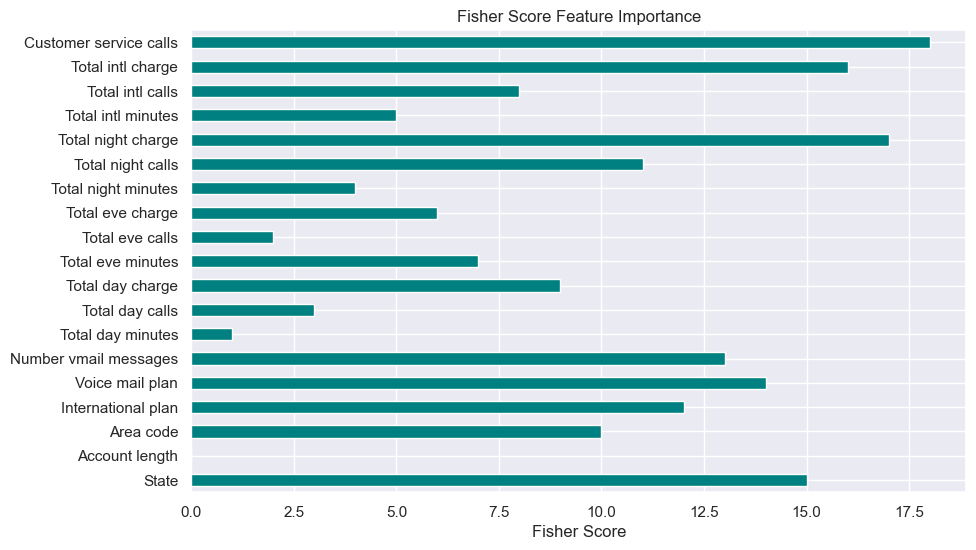

In [19]:
from skfeature.function.similarity_based import fisher_score

# Calculate Fisher scores
# Convert DataFrame to a NumPy array
X_np = X.to_numpy()
y_np=y.to_numpy()
# Calculate Fisher scores
ranks = fisher_score.fisher_score(X_np, y_np)
# Create a Pandas Series with feature importances
feat_importances = pd.Series(ranks, index=X.columns)

# Plot the feature importances
plt.figure(figsize=(10, 6))  
feat_importances.plot(kind='barh', color='teal')
plt.title("Fisher Score Feature Importance")
plt.xlabel("Fisher Score")
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# Calculate Fisher Scores
fisher_selector = SelectKBest(score_func=f_classif, k='all')
fisher_selector.fit(X, y)

# Get the Fisher Scores for each feature
fisher_scores = fisher_selector.scores_

# Sort the features by their Fisher Scores in descending order
sorted_feature_indices = np.argsort(fisher_scores)[::-1]

# Choose the top 'k' features
k = 13  # based on fisher score 
#selected_features_train = X_train[:, sorted_feature_indices[:k]]
#selected_features_validation = X_validation[:, sorted_feature_indices[:k]]

# Select the column names of the top 'k' features from X_train
selected_feature_names = X.columns[sorted_feature_indices[:k]]
# Create a new DataFrame with the selected features
selected_features_train = X[selected_feature_names]

In [21]:
selected_feature_names
selected_features_train.head(5)

,International plan,Customer service calls,Total day charge,Total day minutes,Voice mail plan,Number vmail messages,Total intl charge,Total intl minutes,Total eve minutes,Total eve charge,Total intl calls,Total night minutes,Total night charge
0,0,1,45.07,265.1,1,25,2.70,10.0,197.4,16.78,3,244.7,11.01
1,0,1,27.47,161.6,1,26,3.70,13.7,195.5,16.62,3,254.4,11.45
2,0,0,41.38,243.4,0,0,3.29,12.2,121.2,10.30,5,162.6,7.32
3,1,2,50.90,299.4,0,0,1.78,6.6,61.9,5.26,7,196.9,8.86
4,1,3,28.34,166.7,0,0,2.73,10.1,148.3,12.61,3,186.9,8.41


LR: 0.863470 (0.008172)
LDA: 0.853723 (0.012329)
CART: 0.914863 (0.022966)
NB: 0.863851 (0.015296)
SVM: 0.854465 (0.001356)
RF: 0.954998 (0.009745)
ADA: 0.876971 (0.011807)
GBM: 0.954620 (0.015683)
XGB: 0.957250 (0.013093)


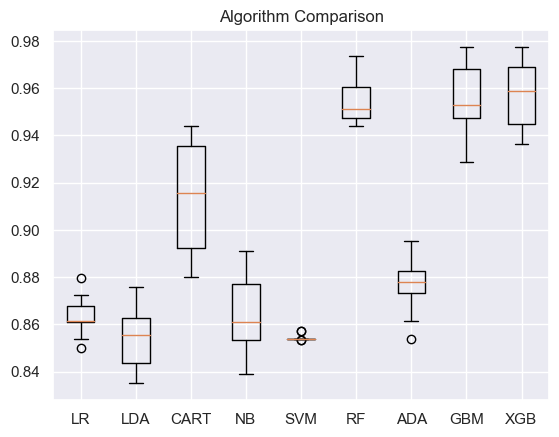

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) #LR
models.append(('LDA', LinearDiscriminantAnalysis()))#LDA
#models.append(('KNN', KNeighborsClassifier()))#KNN
models.append(('CART', DecisionTreeClassifier()))#decision tree
models.append(('NB', GaussianNB()))#gaussian
models.append(('SVM', SVC(gamma='auto')))#SVM

models.append(('RF', RandomForestClassifier()))  # Random Forest
models.append(('ADA', AdaBoostClassifier()))    # AdaBoost
models.append(('GBM', GradientBoostingClassifier()))  # Gradient Boosting
models.append(('XGB', XGBClassifier()))  # XGBoost
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, selected_features_train, y, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

There is a slight increase in accuracy. Let's check the test dataset's accuracy. Don't forget to adjust X_test with the new features.

In [23]:
X_test_features=X_test[selected_feature_names]
X_test_features.shape

(667, 13)

In [24]:
#from sklearn.metrics import confusion_matrix
rf_model=RandomForestClassifier()
rf_model.fit(selected_features_train,y)

gbm_model = GradientBoostingClassifier()
gbm_model.fit(selected_features_train,y)

xgb_model=XGBClassifier()
xgb_model.fit(selected_features_train,y)

rf_predictions = rf_model.predict(X_test_features)
gbm_predictions = gbm_model.predict(X_test_features)
xgb_predictions = xgb_model.predict(X_test_features)

# Calculate the confusion matrices for both models
rf_confusion = classification_report(y_test, rf_predictions)
gbm_confusion = classification_report(y_test, gbm_predictions)
xgb_confusion = classification_report(y_test, xgb_predictions)

# Print or analyze the confusion matrices and acc
print("Confusion Matrix for randomforest:")
print(rf_confusion)
rf_accuracy = accuracy_score(y_test, rf_predictions) * 100
rf_accuracy = "{:.4f}".format(rf_accuracy)
print(rf_accuracy)
print(confusion_matrix(y_test, rf_predictions))

print("Confusion Matrix for GradientBoostingClassifier:")
print(gbm_confusion)
gbm_accuracy = accuracy_score(y_test, gbm_predictions) * 100
gbm_accuracy = "{:.4f}".format(gbm_accuracy)
print(gbm_accuracy)
print(confusion_matrix(y_test, gbm_predictions))

print("\nConfusion Matrix for XGBoost:")
print(xgb_confusion)
xgb_accuracy = accuracy_score(y_test, xgb_predictions) * 100
xgb_accuracy = "{:.4f}".format(xgb_accuracy)
print(xgb_accuracy)
print(confusion_matrix(y_test, xgb_predictions))


Confusion Matrix for randomforest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.95      0.78      0.86        95

    accuracy                           0.96       667
   macro avg       0.96      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667

96.2519
[[568   4]
 [ 21  74]]
Confusion Matrix for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.93      0.73      0.82        95

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667

95.3523
[[567   5]
 [ 26  69]]

Confusion Matrix for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.91      0.79      0.85        95

    a

accuracy:95%-->96%,the other metrics eg f1-score increase 0.01

ref:\
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning (Feature Selection)\
https://www.kaggle.com/code/elizaivantheodore/telecom-churn-analysis (Kaggle code)\
https://machinelearningmastery.com/machine-learning-in-python-step-by-step (machine learning model)